<a href="https://colab.research.google.com/github/costpetrides/Fluid-Dynamics/blob/main/2D-Non-Linear-Convection-Equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Solving 2D Non - Linear Convection Equation using Finite Difference Method

------------------------------------------------
Plotting Initial Solution: Cuboidic Wave Profile
------------------------------------------------


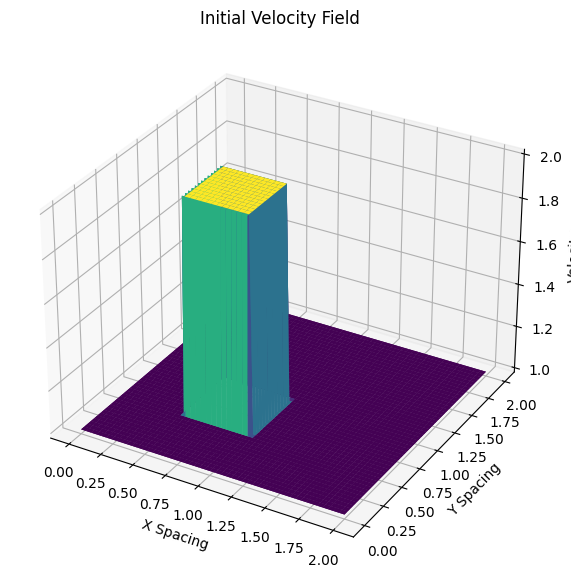

------------------------------------------------
Calculating Numerical Solution......
------------------------------------------------
------------------------------------------------
Plotting Numerical Solution
------------------------------------------------


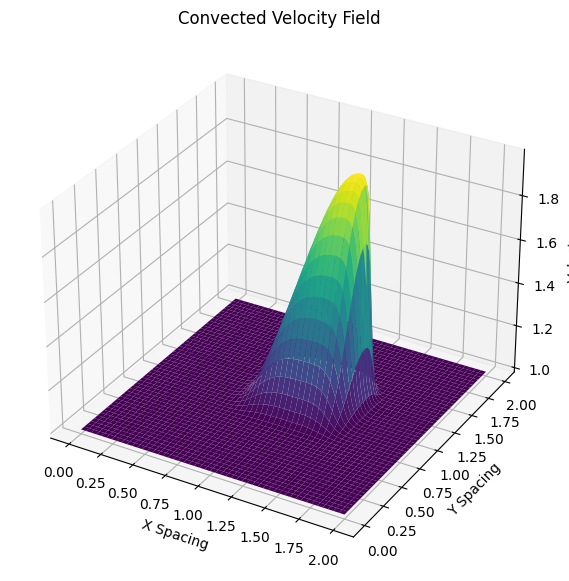

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt, cm
import numpy as np

lineSingle = '------------------------------------------------'

print("Solving 2D Non - Linear Convection Equation using Finite Difference Method\n")

nx = 101  # grid points in x-Direction
ny = 101  # grid points in y-Direction

nt = 80  # number of time step

# grid spacing
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)

cfl = 0.2
dt = cfl * dx  # timestep size

x = np.linspace(0, 2, nx)  # array along x
y = np.linspace(0, 2, ny)  # array along y

# 2d temporaray array where we copy our velocity field
u = np.ones((ny, nx))
v = np.ones((ny, nx))
un = np.ones((ny, nx))
vn = np.ones((ny, nx))

# initial condition
# Cuboidic Wave Profile
u[int(0.5 / dy):int(1 / dy + 1), int(0.5 / dx):int(1 / dx + 1)] = 2
v[int(0.5 / dy):int(1 / dy + 1), int(0.5 / dx):int(1 / dx + 1)] = 2

# plotting initial condition
print(lineSingle)
print("Plotting Initial Solution: Cuboidic Wave Profile")
print(lineSingle)

fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)  # Generating 2D Mesh

ax.plot_surface(X, Y, u, cmap=cm.viridis, rstride=2, cstride=2)
ax.plot_surface(X, Y, v, cmap=cm.viridis, rstride=2, cstride=2)
ax.set_title('Initial Velocity Field')
ax.set_xlabel('X Spacing')
ax.set_ylabel('Y Spacing')
ax.set_zlabel('Velocity')
plt.show()

print(lineSingle)
print("Calculating Numerical Solution......")
print(lineSingle)

for n in range(nt + 1):  # time marching
    un = u.copy()
    vn = v.copy()

    # Backward Difference Scheme
    u[1:, 1:] = (un[1:, 1:] - (un[1:, 1:] * dt / dx * (un[1:, 1:] - un[1:, :-1]))
                 - vn[1:, 1:] * dt / dy * (un[1:, 1:] - un[:-1, 1:]))  # Discretized U-Equation
    v[1:, 1:] = (vn[1:, 1:] - (un[1:, 1:] * dt / dx * (vn[1:, 1:] - vn[1:, :-1]))
                 - vn[1:, 1:] * dt / dy * (vn[1:, 1:] - vn[:-1, 1:]))  # Discretized V-Equation

    # boundary condition
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1

    v[0, :] = 1
    v[-1, :] = 1
    v[:, 0] = 1
    v[:, -1] = 1

print(lineSingle)
print("Plotting Numerical Solution")
print(lineSingle)

fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)

ax.plot_surface(X, Y, u, cmap=cm.viridis, rstride=2, cstride=2)
ax.set_title('Convected Velocity Field')
ax.set_xlabel('X Spacing')
ax.set_ylabel('Y Spacing')
ax.set_zlabel('Velocity')
plt.show()
